In [10]:
import pickle
import pandas as pd
with open('model\lda_model.pkl', 'rb') as f:
  lda_model = pickle.load(f) #import lda model
  
data = pd.read_csv('dataset/DatasetLegal.csv') #read data
question_data = data['question']

with open('model/topic_dict.pkl', 'rb') as f:
  topic_dict = pickle.load(f)

with open('model/question_lda.pkl', 'rb') as f:
   question_lda = pickle.load(f)

with open('model/id2word.pkl', 'rb') as f:
   id2word = pickle.load(f)

for each_doc in question_lda:
    i = 0
    for each_topic in each_doc:
        if(each_topic[0] == i): i+=1
        else: 
            each_doc.insert(i, (i, 0))
            i+=1
    while(i < 6):
        each_doc.append((i, 0))
        i+=1
list_topic = []
for each_doc in question_lda:
    list_topic_each_doc = []
    for each_topic in each_doc:
        list_topic_each_doc.append(each_topic[1])
    list_topic.append(list_topic_each_doc)
list_topic

[[0.035494488, 0.026652364, 0.60259175, 0.059402272, 0.21648578, 0.059373368],
 [0.278622, 0.06714439, 0.54005206, 0.017606834, 0.07225296, 0.024321767],
 [0.11121966, 0.010001538, 0.023806276, 0.20324218, 0.6403387, 0.011391605],
 [0.80063915, 0.029094314, 0.07719158, 0.039709408, 0.026180075, 0.027185543],
 [0.033126604, 0.23656176, 0.01903138, 0.061574817, 0.56062186, 0.08908362],
 [0.0350982, 0.7465349, 0.035038333, 0.11360475, 0.039282653, 0.030441185],
 [0.024975626, 0.110365815, 0.023449766, 0.09733195, 0.720407, 0.02346981],
 [0.18839464, 0.31186372, 0.03704187, 0.28942946, 0.12768787, 0.045582455],
 [0.9108552, 0.01650766, 0.011711805, 0.011631177, 0.03402015, 0.015274053],
 [0.019950993, 0.7875749, 0.030843839, 0.014026694, 0.12511462, 0.022489037],
 [0.047036037, 0.307564, 0.047420476, 0.106929444, 0.05455834, 0.43649176],
 [0.066520765, 0.11493565, 0.1155703, 0.06543883, 0.07892869, 0.5586058],
 [0.08010988, 0.11247933, 0.11456193, 0.45023733, 0.15040717, 0.092204385],
 [0.

In [21]:
distribution_0 = []
distribution_1 = []
distribution_2 = []
distribution_3 = []
distribution_4 = []
distribution_5 = []
for topic_each_doc in list_topic:
    topic_each_doc.sort()
    distribution_0.append(topic_each_doc[5])
    distribution_1.append(topic_each_doc[4])
    distribution_2.append(topic_each_doc[3])
    distribution_3.append(topic_each_doc[2])
    distribution_4.append(topic_each_doc[1])
    distribution_5.append(topic_each_doc[0])

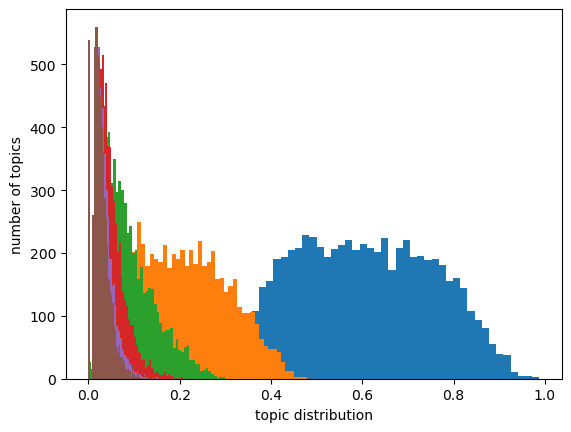

In [42]:
import matplotlib.pyplot as plt
num_bins = 50
label = ['0','1','2','3','4','5']
plt.hist(distribution_0, num_bins)
plt.hist(distribution_1, num_bins)
plt.hist(distribution_2, num_bins)
plt.hist(distribution_3, num_bins)
plt.hist(distribution_4, num_bins)
plt.hist(distribution_5, num_bins)
plt.xlabel('topic distribution')
plt.ylabel('number of topics')
plt.show()

(array([  4.,  11.,  56.,  84., 115., 152., 178., 197., 186., 198., 201.,
        250., 215., 179., 199., 191., 186., 212., 176., 198., 191., 205.,
        180., 204., 183., 219., 180., 185., 203., 159., 161., 138., 148.,
        158., 114., 104., 105., 106.,  87.,  63.,  52.,  47.,  48.,  43.,
         26.,  13.,  13.,   3.,   3.,   2.]),
 array([0.        , 0.0095903 , 0.0191806 , 0.0287709 , 0.03836121,
        0.04795151, 0.05754181, 0.06713211, 0.07672241, 0.08631271,
        0.09590302, 0.10549332, 0.11508362, 0.12467392, 0.13426422,
        0.14385452, 0.15344482, 0.16303513, 0.17262543, 0.18221573,
        0.19180603, 0.20139633, 0.21098663, 0.22057693, 0.23016724,
        0.23975754, 0.24934784, 0.25893814, 0.26852844, 0.27811874,
        0.28770905, 0.29729935, 0.30688965, 0.31647995, 0.32607025,
        0.33566055, 0.34525085, 0.35484116, 0.36443146, 0.37402176,
        0.38361206, 0.39320236, 0.40279266, 0.41238297, 0.42197327,
        0.43156357, 0.44115387, 0.45074417, 0.

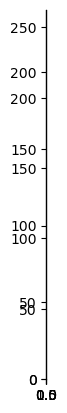

In [45]:
plt.subplot(1, len(distribution_0), 1)
plt.hist(distribution_0, num_bins)
plt.subplot(1, len(distribution_1), 2)
plt.hist(distribution_1, num_bins)